# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns
import numpy as np
import IPython as ipy
import math



# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_combined = pd.DataFrame.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
mouse_combined.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
number_mice = mouse_combined["Mouse ID"].nunique()
number_mice

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_dup = mouse_combined.loc[mouse_combined.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
mouse_dup_ID = mouse_dup["Mouse ID"].unique()

"""
We identified the duplicate mice by Mouse ID and Timepoint, using keep=False to show all duplicates not just the first occurence of the duplicate.
The duplicate mice are: ['g989'], we want to store this in a list for later use.
"""
mouse_dup_ID

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_dup_ID = mouse_dup_ID[0]


"""
We used the loc function to get all the data for the duplicate mouse ID. We do that by filtering the Mouse ID column for the duplicate mouse ID.
"""
mouse_combined.loc[mouse_combined["Mouse ID"] == mouse_dup_ID]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data_clean = mouse_combined.drop(mouse_combined[mouse_combined["Mouse ID"] == mouse_dup_ID].index)

"""
We used the drop function to drop the duplicate mouse by its ID. We do that by filtering the Mouse ID column for the duplicate mouse ID and using the index to drop the row.
"""
mouse_data_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
mouse_data_clean["Mouse ID"].nunique()

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
Mean_Drug_Tumor = mouse_data_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
Mean_Drug_Tumor = Mean_Drug_Tumor.rename("Mean Tumor Volume")
Median_Drug_Tumor = mouse_data_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
Median_Drug_Tumor = Median_Drug_Tumor.rename("Median Tumor Volume")
Variance_Drug_Tumor = mouse_data_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
Variance_Drug_Tumor = Variance_Drug_Tumor.rename("Tumor Volume Variance")
Std_Drug_Tumor = mouse_data_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
Std_Drug_Tumor = Std_Drug_Tumor.rename("Tumor Volume Std. Dev.")
SEM_Drug_Tumor = mouse_data_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()
SEM_Drug_Tumor = SEM_Drug_Tumor.rename("Tumor Volume Std. Err.")
summary_stats = pd.concat([Mean_Drug_Tumor, Median_Drug_Tumor, Variance_Drug_Tumor, Std_Drug_Tumor, SEM_Drug_Tumor], axis=1)
"""
We used the groupby function to group the data by Drug Regimen and then used the mean, median, var, std, and sem functions to calculate the mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen.
We then used the concat function to combine the series into a single summary DataFrame. This is different from a merge because we are combining the series into a single DataFrame instead of combining two DataFrames into a single DataFrame.
A more efficient way to do this would be to use the agg function to calculate all the summary statistics at once or to use the describe function to calculate all the summary statistics at once.
"""
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = mouse_data_clean.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
"""
We used the groupby function to group the data by Drug Regimen and then used the agg function to calculate all the summary statistics at once. The agg function takes a dictionary as an argument. The keys of the dictionary are the columns we want to calculate the summary statistics for and the values of the dictionary are the summary statistics we want to calculate.
the available agg functions are: mean, median, var, std, sem, min, max, count, sum, prod, first, and last.
"""
summary_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

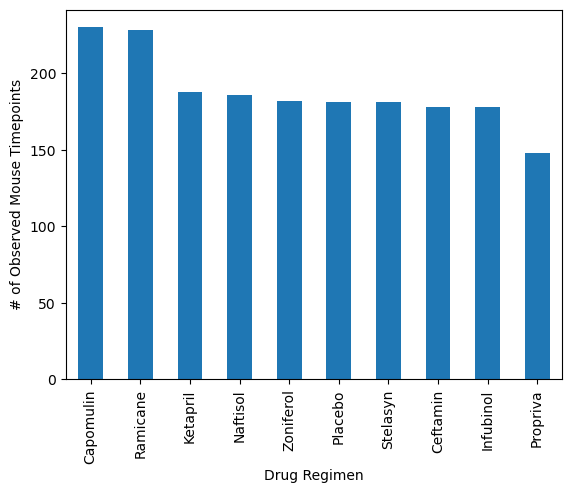

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

"""
We used the groupby function to group the data by Drug Regimen and then used the count function to calculate the total number of rows (Mouse ID/Timepoints) for each drug regimen.
We did not need to use the count function because the Mouse ID column is the same as the Timepoints column. We could have used the Mouse ID column instead of the Timepoints column.
In the scenario the combination of Mouse ID and Timpepoints represents an observation per drug regimen which is why we care. Statistically this sets up the data to understand our sample size per drug regimen.

We then used the plot function to plot the data as a bar plot. This required us to use the sort_values function to sort the data by the Mouse ID column in descending order, otherwise the data would be plotted in alphabetical order.
We also needed to label the y-axis with the ylabel function.
"""
pd.DataFrame(mouse_data_clean.groupby("Drug Regimen").count()["Mouse ID"]).sort_values(by="Mouse ID", ascending=False).plot(kind="bar", legend=False,ylabel="# of Observed Mouse Timepoints")



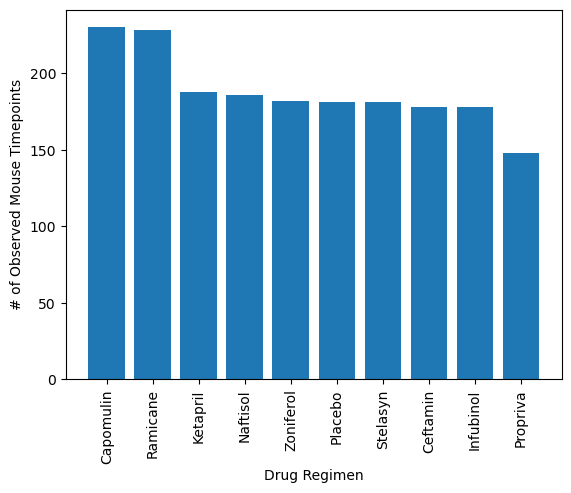

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
X = pd.DataFrame(mouse_data_clean.groupby("Drug Regimen").count()["Mouse ID"]).sort_values(by="Mouse ID", ascending=False).index
Y = pd.DataFrame(mouse_data_clean.groupby("Drug Regimen").count()["Mouse ID"]).sort_values(by="Mouse ID", ascending=False)["Mouse ID"]
plt.bar(X, Y)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.show()

<Axes: ylabel='Sex'>

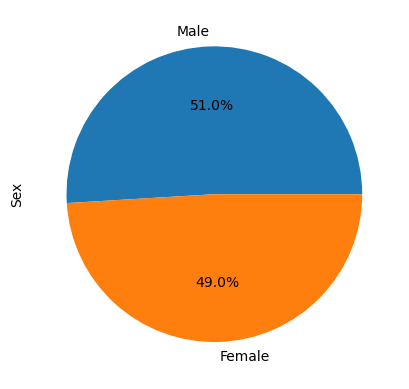

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

"""
We grouped by Sex because it represents the whole population of mice, not just the unique mice. Then we counted the occurences of sex in the Mouse ID column.
We sorted the values by Mouse ID to get the largest values first, and then plotted the pie chart. If we didnt sort the values, the pie chart would be in a different order.
"""
pd.DataFrame(mouse_data_clean.groupby("Sex").count()["Mouse ID"]).sort_values(by="Mouse ID", ascending=False).plot(kind="pie", y="Mouse ID", legend=False, autopct="%1.1f%%", ylabel="Sex")

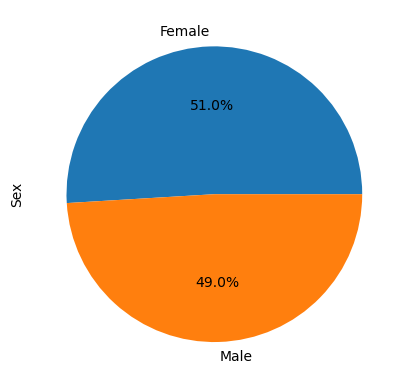

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_data = pd.DataFrame(mouse_data_clean.groupby("Sex").count()["Mouse ID"]).sort_values(by="Mouse ID", ascending=False)
pies = pie_data["Mouse ID"].values
plt.pie(pies, labels=mouse_data_clean["Sex"].unique(), autopct="%1.1f%%")
plt.ylabel("Sex")

"""
Created a Pie chart using pyplot, using the same data as the Pandas Pie chart. Then created the format for the pie chart, and then labeled the pie chart.
"""
plt.show()

## Quartiles, Outliers and Boxplots

In [27]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
Greatest_Timepoint = pd.DataFrame(mouse_data_clean.groupby("Mouse ID").max()["Timepoint"])
Greatest_Timepoint.reset_index(inplace=True)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Greatest_Timepoint = pd.DataFrame.merge(Greatest_Timepoint, mouse_data_clean, how="left", on=["Mouse ID", "Timepoint"])

"""
We used the groupby function to group the data by Mouse ID and then used the max function to calculate the greatest timepoint for each mouse. 
This is the last timepoint since the timepoints are consecutive and the max timepoint is the last timepoint. This will provide us a dataframe with the greatest tumor volume for each mouse which can then be grouped by drug regimen.
We then used the merge function to merge the Greatest_Timepoint dataframe with the mouse_data_clean dataframe on the Mouse ID and Timepoint columns.
"""
Greatest_Timepoint



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol.append(Greatest_Timepoint.loc[Greatest_Timepoint["Drug Regimen"] == treatment]["Tumor Volume (mm3)"])
    
    # add subset 
    subset = Greatest_Timepoint.loc[Greatest_Timepoint["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    # We need a subset of the data to calculate the IQR and potential outliers. We used the loc function to locate the rows which contain mice on each drug and get the tumor volumes.
    # quartiles, outliers, and bounds are single series calculations. We used the loc function to locate the rows which contain mice on each drug and get the tumor volumes.
    
    # Determine outliers using upper and lower bounds
    quartiles = subset.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    median = quartiles[0.5]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outliers = subset.loc[(subset < lower_bound) | (subset > upper_bound)]
    print(f"{treatment} outliers: {outliers}")


Capomulin outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


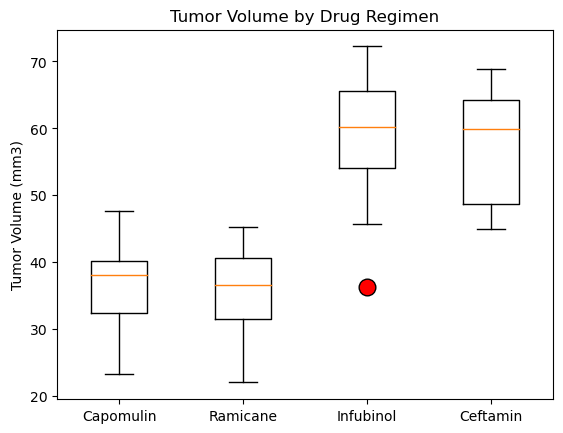

In [28]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol, labels=treatments,flierprops=dict(markerfacecolor='r',markeredgecolor='black', marker='o', markersize=12))
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume by Drug Regimen")
plt.show()


## Line and Scatter Plots

In [16]:
#list all mice in the Capomulin regimen
Capomulin_mice = Greatest_Timepoint.loc[Greatest_Timepoint["Drug Regimen"] == "Capomulin"]["Mouse ID"].unique()
Capomulin_mice

array(['b128', 'b742', 'f966', 'g288', 'g316', 'i557', 'i738', 'j119',
       'j246', 'l509', 'l897', 'm601', 'm957', 'r157', 'r554', 'r944',
       's185', 's710', 't565', 'u364', 'v923', 'w150', 'w914', 'x401',
       'y793'], dtype=object)

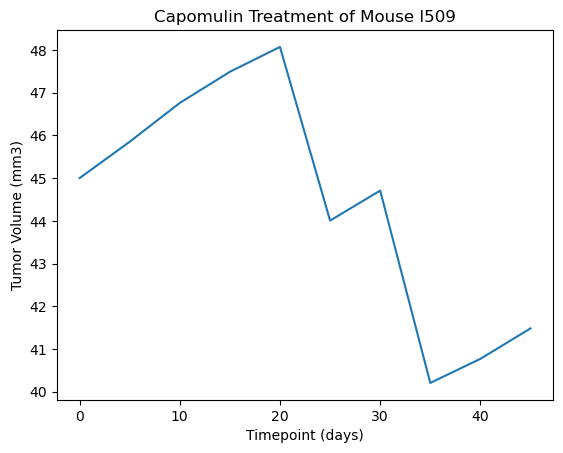

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
plt.plot(mouse_data_clean.loc[mouse_data_clean["Mouse ID"] == "l509"]["Timepoint"], mouse_data_clean.loc[mouse_data_clean["Mouse ID"] == "l509"]["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse l509")
plt.show()

<Axes: title={'center': 'Mouse Weight vs. Average Tumor Volume for Capomulin Regimen'}, xlabel='Weight (g)', ylabel='Average Tumor Volume (mm3)'>

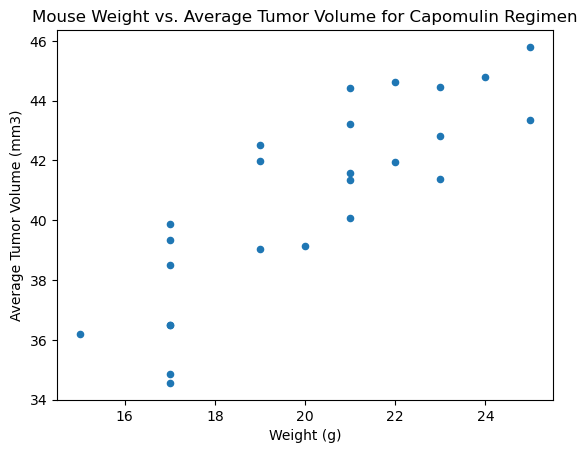

In [30]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Capomulin_df = mouse_data_clean.loc[mouse_data_clean["Drug Regimen"] == "Capomulin"]
Capomulin_df_grouped = Capomulin_df.groupby(["Mouse ID", "Weight (g)"])[["Tumor Volume (mm3)"]].mean()
Capomulin_df_grouped = Capomulin_df_grouped.reset_index()
Capomulin_df_grouped.sort_values(by=["Weight (g)","Tumor Volume (mm3)"], ascending=True, inplace=True)
Capomulin_df_grouped.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", title="Mouse Weight vs. Average Tumor Volume for Capomulin Regimen", ylabel="Average Tumor Volume (mm3)")


## Correlation and Regression

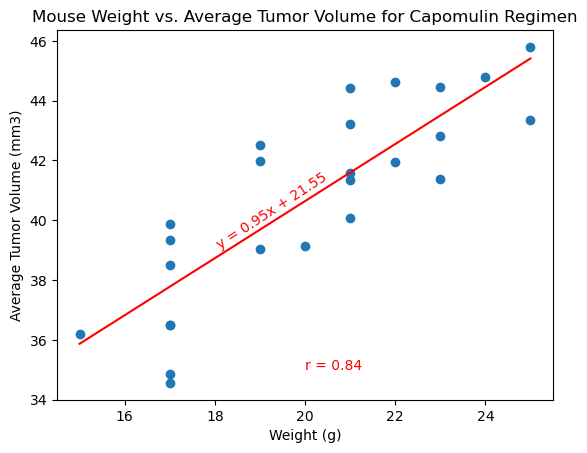

The correlation coefficient between mouse weight and average tumor volume is 0.84


In [54]:
# Calculate the correlation coefficient and a linear regression model 
Cap_Slope, Cap_intercept, Cap_Pearson, Cap_Pvalue, Cap_std_err = st.linregress(Capomulin_df_grouped["Weight (g)"], Capomulin_df_grouped["Tumor Volume (mm3)"])
Cap_fit_line = Cap_Slope * Capomulin_df_grouped["Weight (g)"] + Cap_intercept
#create anlge for the fit line annotation
angle = math.cos(Cap_Slope)
angle_degrees = math.degrees(angle)

# get an X and Y value along the regression line to use for the annotation
x = 18
y = Cap_Slope * x + Cap_intercept

# for mouse weight and average observed tumor volume for the entire Capomulin regimen
plt.scatter(Capomulin_df_grouped["Weight (g)"], Capomulin_df_grouped["Tumor Volume (mm3)"])
plt.plot(Capomulin_df_grouped["Weight (g)"], Cap_fit_line, color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
#add the coefficient text to the plot
plt.annotate(f"y = {round(Cap_Slope,2)}x + {round(Cap_intercept,2)}", (x,y+0.3), color="red", rotation=angle_degrees)
plt.annotate(f"r = {round(Cap_Pearson,2)}", (20,35), color="red")
plt.show()
print(f"The correlation coefficient between mouse weight and average tumor volume is {round(Cap_Pearson,2)}")